<a href="https://colab.research.google.com/github/Tapomay1/Netflix-Movies-and-TV-Shows/blob/main/Netflix_Movies_and_TV_Shows_Unsupervised_Learning_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Netflix Movies and TV Shows Clustering**

#####**Project Type** - Unsupervised Learning
#####**Contribution** - Team
##### **Team Member - 1** - Tapomay Sahoo
##### **Team Member - 2** - Shivam Tiwari

#**Project Summary**

Hello, all. We have worked on the Netflix Movies and TV Shows dataset provided by a third party until the year of 2019. The dataset contains information of the various TV Shows, Movies, Documentaries and many more content on the streaming service provider's website.

Title, Cast, Director, Country of Production and Description are some of the things available for each content on the streaming website.

We have tried to work on the data and get three things out of it:

a. We have tried to generate insights through the EDA process

b. We have tried to analyse the change in Netflix's operations

c. And most importantly, we have tried to build a machine learning clustering model that helps us segregate the contents based on similarity in various features.

We hope that you like the project and we would like to listen to your thoughts on it. You can reach us at er.tapomay@gmail.com and shivchirag1997@gmail.com

#**Github Link**

The official github link of the project is https://github.com/Tapomay1/Netflix-Movies-and-TV-Shows

# **Problem Statement**


**BUSINESS OVERVIEW**

Netflix is a very popular online streaming service provider offering a variety of TV shows, movies, documentaries and lots more to watch. We have the dataset containing the list of their TV shows, movies and the other content that they have on their platform. The list is procured from a third party website and contains information until 2019.

We are supposed to offer insights from the dataset on Netflix and its content. We are also supposed to cluster the contents based on text features.

# ***Let's Begin !*** 

## ***1. Know Your Data***

####Import Libraries

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import nltk 
nltk.download('all',quiet=True)
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

####Dataset Loading

In [ ]:
# Importing the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module_04/Unsupervised_3/csv/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
# Generating a copy
df = dataset.copy()

####Dataset Overview

In [ ]:
# First view of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# No. of rows and columns
df.shape

(7787, 12)

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


####Duplicate and Null Values

In [ ]:
# Duplicates in the dataset
len(df[df.duplicated()])

0

In [ ]:
# Missing Values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


#### What do we know now about the dataset?

From the first looks, the dataset looks like it will need some cleaning. Apart from the missing values, we have also encountered some discripencies in the values for some of the columns after going through the GSheet.

We have 7787 datapoints and 12 columns. Most of the variables are text data. Only release year is numeric, but it is also discrete in nature.

## ***2. Understanding the variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.00,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.93,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.76,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.00,NaN,NaN,NaN,NaN


####Variables Description

**show_id :** Unique ID for every TV show/movie

**type :** Movie or a TV Show

**title :** Title of the content

**director :** Director of the content

**cast :** Star cast of the content

**country :** Country of production

**date_added :** Date the content was added on Netflix

**release_year :** Release year of the content

**rating :** TV Rating of the content

**duration :** No. of mins (how long) in case of movies and No. of seasons in case of TV shows

**listed_in :** Genre of the content

**description :** Summary description for the content

####Checking number of unique values

In [ ]:
# Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## ***3. Data Wrangling***

In [ ]:
# Converting the Date column to datetime datatype
df.date_added = pd.to_datetime(df.date_added,dayfirst=True)

In [ ]:
# Creating columns for month, year and day of the week when the contents were added
df['month_added'] = pd.DatetimeIndex(df.date_added).month
df['day_of_week_added'] = pd.DatetimeIndex(df.date_added).dayofweek
df['year_added'] = pd.DatetimeIndex(df.date_added).year
df['day_of_month_added'] = pd.DatetimeIndex(df.date_added).day

In [ ]:
df['date_month_added'] = df['date_added'].dt.strftime('%d-%m %H:%M:%S')

In [ ]:
# Segregating the dataset based on content type
tv_df = df[df.type=='TV Show']
movies_df = df[df.type=='Movie']

We have segregated the dataset based on the content type. We have also made the date_added column's datatype datetime. And then we extracted the month, year and day of the week as individual columns from the main column.

## ***4. Understanding the relationships between variables using different kinds of visualisation techniques:***


####4.1 How many TV shows and how many movies?

In [ ]:
pie_data = df.type.value_counts(normalize=True).reset_index()
pie_data

,index,type
0,Movie,0.69
1,TV Show,0.31


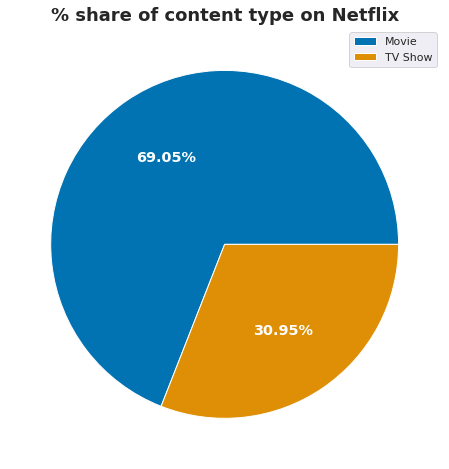

In [ ]:
# Plotting the graph
sns.set_palette("colorblind")
plt.figure(figsize=(12,8))
plt.pie(pie_data['type'],
        labels = pie_data['index'].values,
        autopct = "%.2f%%", # % values in 2 decimals
        textprops = {"size":"x-large",
                     "fontweight":"bold",
                     "color":"w"}) # styling the text
plt.legend()
# Giving our chart a suitable title
plt.title("% share of content type on Netflix", fontweight = "bold", fontsize = 18)
plt.show();

**Observation:**

There are more than double the amount of Movies than TV Shows on Netflix. Movies account for 69.05% whereas TV Shows account for 30.95% of the dataset.

####4.2 Which are the top 20 dates when the contents are added?

In [ ]:
# Preparing the dataset
bar_data = df.groupby('date_month_added').agg({'date_month_added':'count'}).rename(columns={'date_month_added':'count'}).reset_index().sort_values(by='count', ascending=False).head(20)
bar_data['date_month_added'] = bar_data['date_month_added'].astype('str')
new = bar_data['date_month_added'].str.split(' ', expand=True)
bar_data['date_month_added'] = new[0]
bar_data.head()

,date_month_added,count
0,01-01,320
9,01-10,257
10,01-11,244
6,01-07,179
3,01-04,156


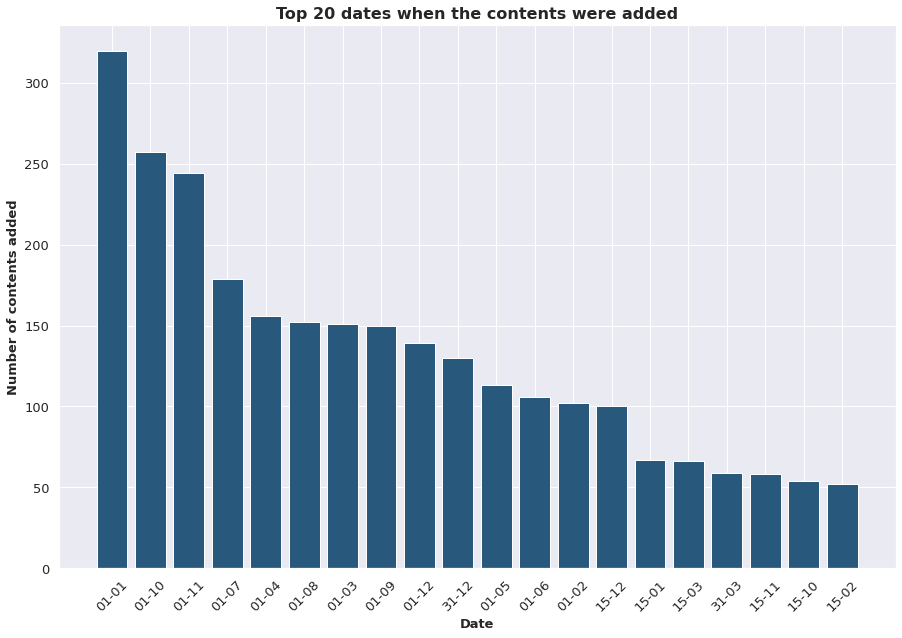

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['date_month_added'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize = 13)
plt.title('Top 20 dates when the contents were added', fontsize = 16, fontweight = 'bold')
plt.xlabel('Date', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents added', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

If we look at the distribution of the dates when the contents were added, the second half of a year (the holiday period) is usually when they add the content and it is either on the 1st or the 15th or the 31st.

####4.3 Distribution of the content's country of production

In [ ]:
# Preparing the dataset
# Overall country count
country_df = df.country.str.split(', ', expand=True).stack().reset_index().rename(columns={'level_0':'index','level_1':'nth country',0:'country'})
country_df = country_df.country.value_counts().reset_index().rename(columns={'index':'country','country':'total'})
# Country count for movies
movies_country_df = movies_df.country.str.split(', ', expand=True).stack().reset_index().rename(columns={'level_0':'index','level_1':'nth country',0:'country'})
movies_country_df = movies_country_df.country.value_counts().reset_index().rename(columns={'index':'country','country':'total_movies'})
# Country count for TV Shows
tv_country_df = tv_df.country.str.split(', ', expand=True).stack().reset_index().rename(columns={'level_0':'index','level_1':'nth country',0:'country'})
tv_country_df = tv_country_df.country.value_counts().reset_index().rename(columns={'index':'country','country':'total_TV'})
# Merging the datsets
country_df = country_df.merge(movies_country_df, on='country')
country_df = country_df.merge(tv_country_df, on='country')
country_df.head()

,country,total,total_movies,total_TV
0,United States,3296,2430,866
1,India,990,915,75
2,United Kingdom,722,466,256
3,Canada,412,286,126
4,France,349,265,84


In [ ]:
# Selecting the dataset
bar_data = country_df.head(10)
bar_data

,country,total,total_movies,total_TV
0,United States,3296,2430,866
1,India,990,915,75
2,United Kingdom,722,466,256
3,Canada,412,286,126
4,France,349,265,84
5,Japan,287,103,184
6,Spain,215,158,57
7,South Korea,212,55,157
8,Germany,199,157,42
9,Mexico,154,101,53


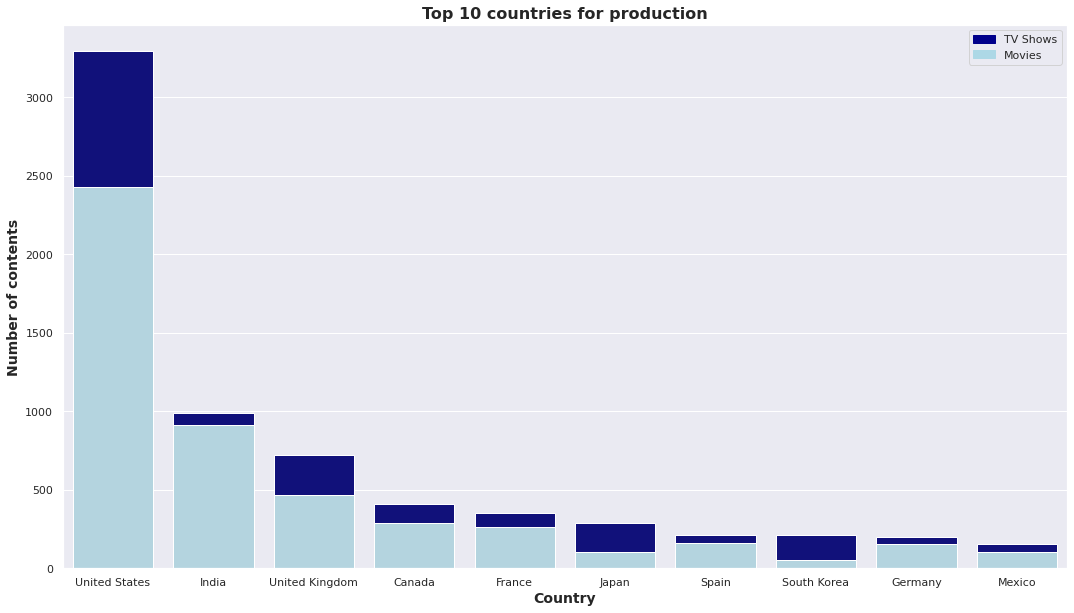

In [ ]:
# Creating the plot
sns.set(style="darkgrid")
plt.figure(figsize=(18,10))
bar1 = sns.barplot(x="country",  y="total", data=bar_data, color='darkblue')
bar2 = sns.barplot(x="country",  y="total_movies", data=bar_data, ci=None, color='lightblue')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='TV Shows')
bottom_bar = mpatches.Patch(color='lightblue', label='Movies')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel('Country', fontsize = 14, weight = "bold")
plt.ylabel('Number of contents', fontsize = 14, weight = "bold")
plt.title('Top 10 countries for production', fontsize = 16, weight = "bold")
# show the graph
plt.show();

**Observation:**

United States has the highest number of contents produced and it is three times in numbers when compared with the next best in line, India.

Countries generally focus a lot on movies, but there are exceptions. East Asian countries like Japan and South Korea produce more TV Shows than movies.

Whereas, a country like India could do a lot better in the TV Shows domain.

####4.4 Which are the popular years and months for TV series and movies addition?

In [ ]:
# Creating the dataset
# Overall data
year_added_df = df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'total'})
year_added_df['year'] = year_added_df['year'].astype('int')
# TV data
tv_year_added = tv_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'total_tv'})
tv_year_added['year'] = tv_year_added['year'].astype('int')
# Movies data
movies_year_added = movies_df.year_added.value_counts().reset_index().rename(columns={'index':'year','year_added':'total_movies'})
movies_year_added['year'] = movies_year_added['year'].astype('int')
# Merging the datasets
year_added_df = year_added_df.merge(tv_year_added, on='year')
year_added_df = year_added_df.merge(movies_year_added, on='year')
# Sorting the values and keeping only years till 2020
year_added_df = year_added_df.sort_values(by='year').reset_index(drop=True)
year_added_df = year_added_df[year_added_df['year'].isin([x for x in range(2000,2021)])]
line_data = year_added_df

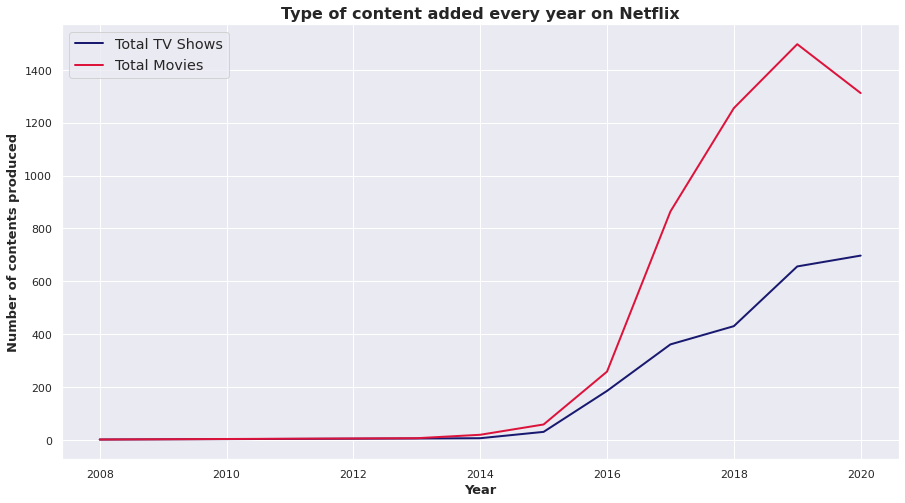

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data['year'], line_data['total_tv'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['year'], line_data['total_movies'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of contents produced', fontsize = 13, fontweight = 'bold')
plt.xlabel('Year', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Total TV Shows','Total Movies']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Type of content added every year on Netflix', fontsize = 16, fontweight = "bold")
plt.show();

**Observation:**

Netflix really took off since 2015, before which the rate at which newer contents were added were quite slow. Also, while movies are added in large numbers, their growth has stopped and the numbers went down for the first time while going from 2019 to 2020.

While in contrast, TV Shows have almost shown a steady growth and never saw any kind of drop in numbers, not even going in 2020.

In [ ]:
# Creating the dataset
# Overall data
month_added_df = df.month_added.value_counts().reset_index().rename(columns={'index':'month','month_added':'total'})
month_added_df['month'] = month_added_df['month'].astype('int')
# TV data
tv_month_added = tv_df.month_added.value_counts().reset_index().rename(columns={'index':'month','month_added':'total_tv'})
tv_month_added['month'] = tv_month_added['month'].astype('int')
# Movies data
movies_month_added = movies_df.month_added.value_counts().reset_index().rename(columns={'index':'month','month_added':'total_movies'})
movies_month_added['month'] = movies_month_added['month'].astype('int')
# Merging the datasets
month_added_df = month_added_df.merge(tv_month_added, on='month')
month_added_df = month_added_df.merge(movies_month_added, on='month')
# Sorting the values
month_added_df = month_added_df.sort_values(by='month').reset_index(drop=True)
line_data = month_added_df

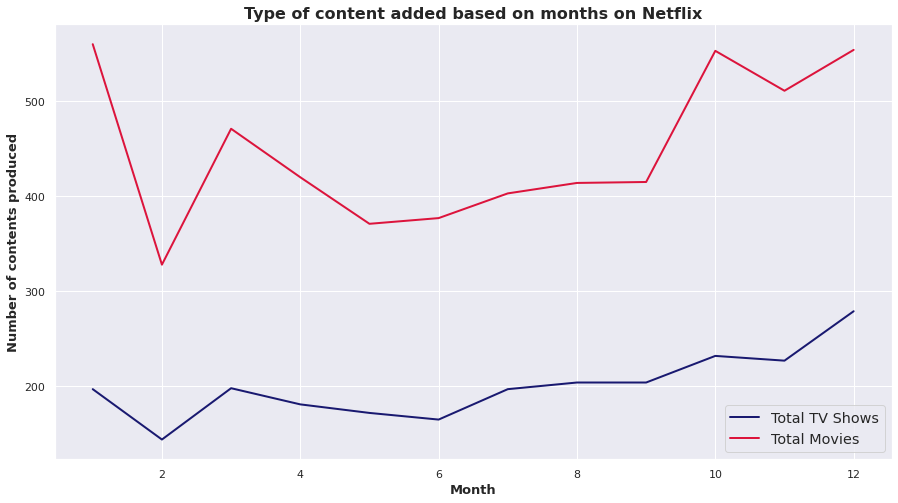

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data['month'], line_data['total_tv'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['month'], line_data['total_movies'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of contents produced', fontsize = 13, fontweight = 'bold')
plt.xlabel('Month', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Total TV Shows','Total Movies']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Type of content added based on months on Netflix', fontsize = 16, fontweight = "bold")
plt.show();

**Observation:**

January, December and October are the peak months. Whereas, February and May to September don't have much contents added, relatively. March has an abnormal behaviour when compared with the rest of the months.

####4.5 Which day of the week is more popular for new contents?

In [ ]:
# Preparing the dataset
day_added = df.groupby('day_of_week_added').agg({'show_id':'count'}).rename(columns={'show_id':'total'}).reset_index()
tv_day = tv_df.groupby('day_of_week_added').agg({'show_id':'count'}).rename(columns={'show_id':'total_tv'}).reset_index()
movies_day = movies_df.groupby('day_of_week_added').agg({'show_id':'count'}).rename(columns={'show_id':'total_movies'}).reset_index()
day_added = day_added.merge(tv_day, on='day_of_week_added')
day_added = day_added.merge(movies_day, on='day_of_week_added')
day_added['day_of_week_added'] = day_added['day_of_week_added'].astype('int')
bar_data = day_added

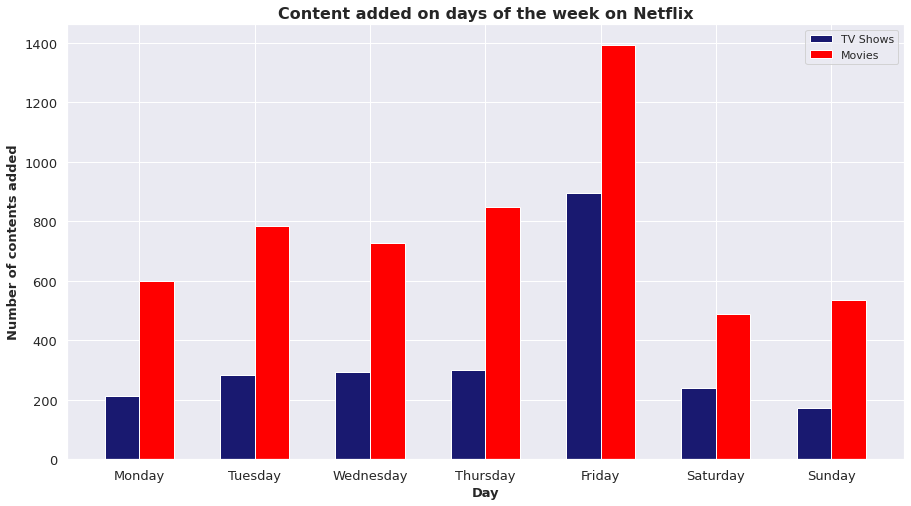

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
x = np.arange(7)
plt.bar(x = x-0.15, 
        height = bar_data['total_tv'],
        width = 0.3,
        color = 'midnightblue')
plt.bar(x = x+0.15,
        height = bar_data['total_movies'],
        width = 0.3,
        color = 'red')
plt.xticks(x, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Content added on days of the week on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Day', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents added', fontsize = 13, fontweight = 'bold')
plt.legend(['TV Shows', 'Movies'])
plt.show();

**Observation:**

Weekends have the lowest number of releases. However, Friday has the highest of all the days of the week. Movies again are larger in number than TV Shows and the trend is almost similar between the two on all the days.

####4.6 What are the popular years of TV series and movies releases?

In [ ]:
# Creating the dataset
# Overall data
release_year_df = df.release_year.value_counts().reset_index().rename(columns={'index':'year','release_year':'total'})
release_year_df['year'] = release_year_df['year'].astype('int')
# TV data
tv_release_year = tv_df.release_year.value_counts().reset_index().rename(columns={'index':'year','release_year':'total_tv'})
tv_release_year['year'] = tv_release_year['year'].astype('int')
# Movies data
movies_release_year = movies_df.release_year.value_counts().reset_index().rename(columns={'index':'year','release_year':'total_movies'})
movies_release_year['year'] = movies_release_year['year'].astype('int')
# Merging the datasets
release_year_df = release_year_df.merge(tv_release_year, on='year')
release_year_df = release_year_df.merge(movies_release_year, on='year')
# Sorting the values
release_year_df = release_year_df.sort_values(by='year').reset_index(drop=True)
release_year_df = release_year_df[release_year_df['year'].isin([x for x in range(1900,2021)])]
line_data = release_year_df

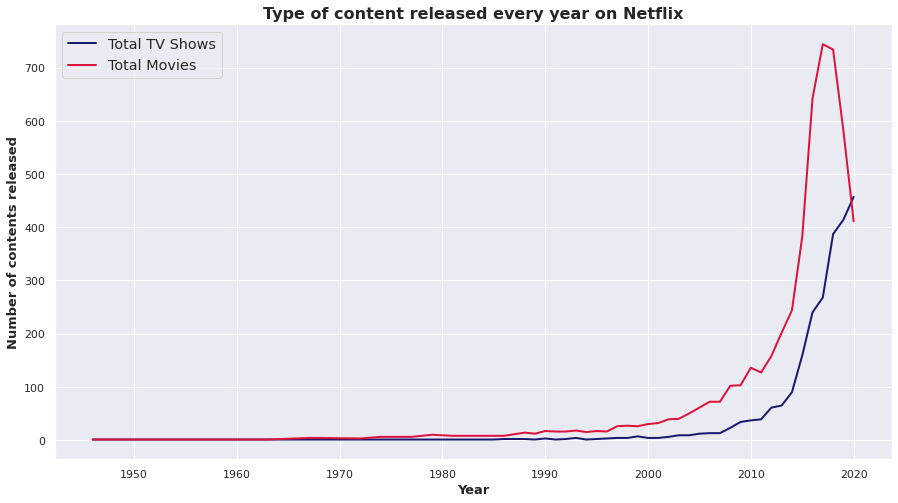

In [ ]:
# Setting the size of the figure
plt.figure(figsize = (15,8))
# Plotting the lines
plt.plot(line_data['year'], line_data['total_tv'], color = 'midnightblue', linewidth = 2)
plt.plot(line_data['year'], line_data['total_movies'], color = 'crimson', linewidth = 2)
# Assigning the labels
plt.ylabel('Number of contents released', fontsize = 13, fontweight = 'bold')
plt.xlabel('Year', fontsize = 13, fontweight = 'bold')
# Adding labels
labels = ['Total TV Shows','Total Movies']
plt.legend(labels = labels, fontsize = 'large')
plt.title('Type of content released every year on Netflix', fontsize = 16, fontweight = "bold")
plt.show();

**Observation:**

Again, the content released graph has very little surprises for us. The focus has shifted a lot on releasing newer TV shows more than movies. So much has the focus shifted that for the first time ever, in 2020, the number of TV shows released surpassed the number of movie releases on Netflix. 

####4.7 What is the distribution of ratings among the contents on Netflix?

In [ ]:
bar_data = df.rating.value_counts().reset_index().rename(columns={'index':'rating','rating':'count'})

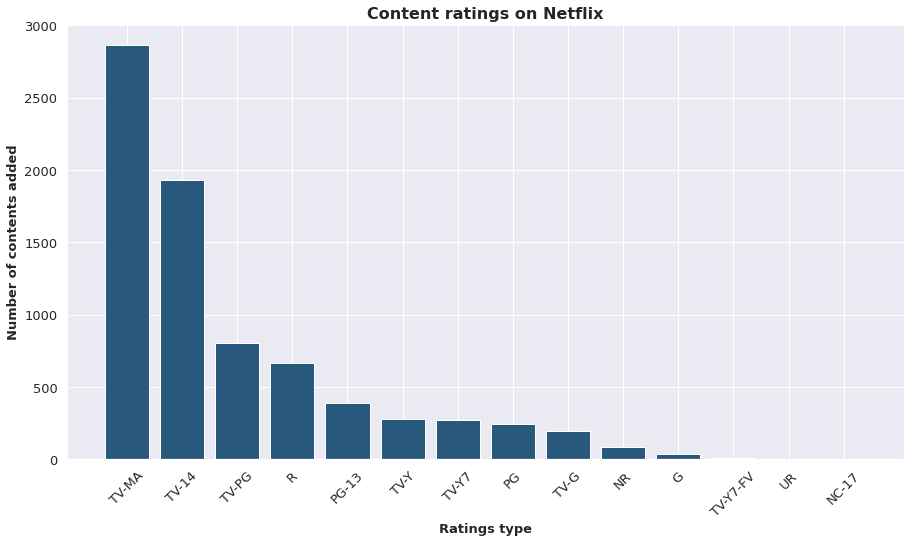

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['rating'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 45)
plt.yticks(fontsize = 13)
plt.title('Content ratings on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Ratings type', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents added', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

Contents suitable for all are very few in number whereas contents with restrictions like TV-MA (unsuitable for under 17), TV-14 (may be unsuitable for under 14) and TV-PG (unsuitable for young childern) are the three highest in numbers.

####4.8 What is the distribution of the duration of the content on Netflix?

In [ ]:
# Preparing the dataset
tv_duration = tv_df.duration.value_counts().reset_index().rename(columns={'index':'No_of_seasons','duration':'count'})
new = tv_duration['No_of_seasons'].str.split(' ', expand=True)
tv_duration['No_of_seasons'] = new[0]
bar_data = tv_duration

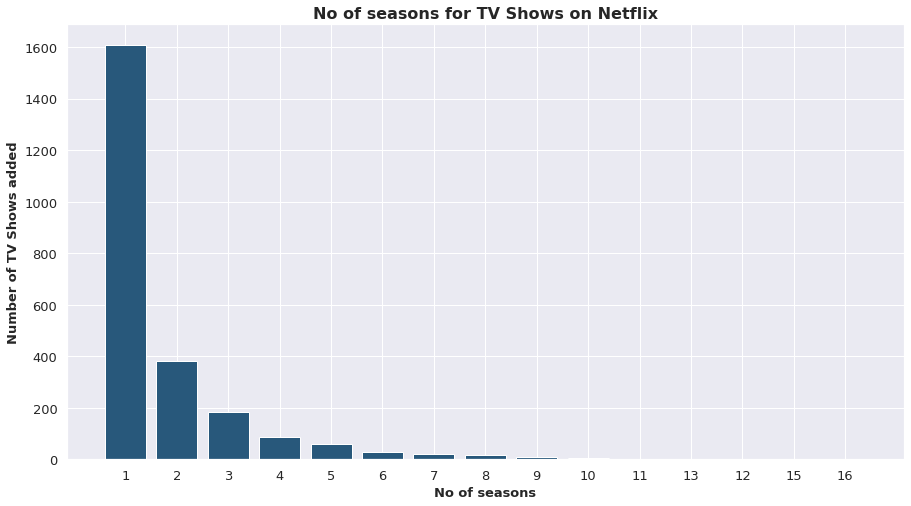

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['No_of_seasons'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('No of seasons for TV Shows on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('No of seasons', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of TV Shows added', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

A lot of TV Shows (more than 1600) have only one season. Almost 400 have two and there is almost an exponential decrement in the number of TV Shows with even larger number of seasons.

In [ ]:
# Preparing the dataset
new = movies_df.duration.str.split(' ', expand=True)
movies_duration = new[0]
movies_duration = movies_duration.astype('int')
movies_duration = movies_duration.reset_index().rename(columns={0:'No_of_mins'})
movies_duration

,index,No_of_mins
0,1,93
1,2,78
2,3,80
3,4,123
4,6,95
...,...,...
5372,7781,88
5373,7782,99
5374,7783,111
5375,7784,44


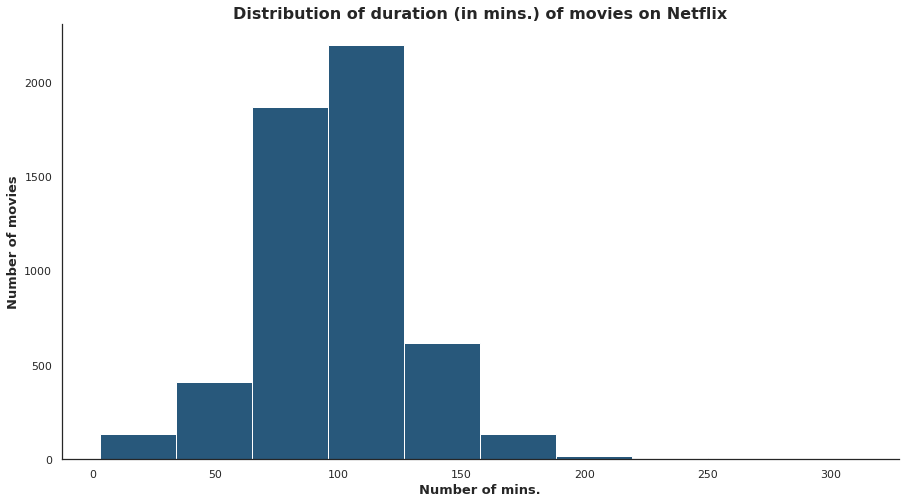

In [ ]:
# Histogram plot
sns.set_style('white')
plt.figure(figsize = (15,8))
plt.hist(movies_duration['No_of_mins'],
         bins = 10,
         color = '#28587B')
plt.title('Distribution of duration (in mins.) of movies on Netflix', fontsize = 16, weight = "bold")
plt.xlabel('Number of mins.', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of movies', fontsize = 13, fontweight = 'bold')
sns.despine()
plt.show();

**Observation:**

A lot of the movies are between 60 to 150 mins long. But there are movies with more than 300+ minutes duration.

####4.9 What is the distribution of genres of the contents on Netflix?

In [ ]:
# Preparing the dataset
genre_df = df['listed_in'].str.split(', ', expand=True).stack()
genre_df = genre_df.value_counts().reset_index().rename(columns={'index':'genre',0:'count'})
bar_data = genre_df.head(10)

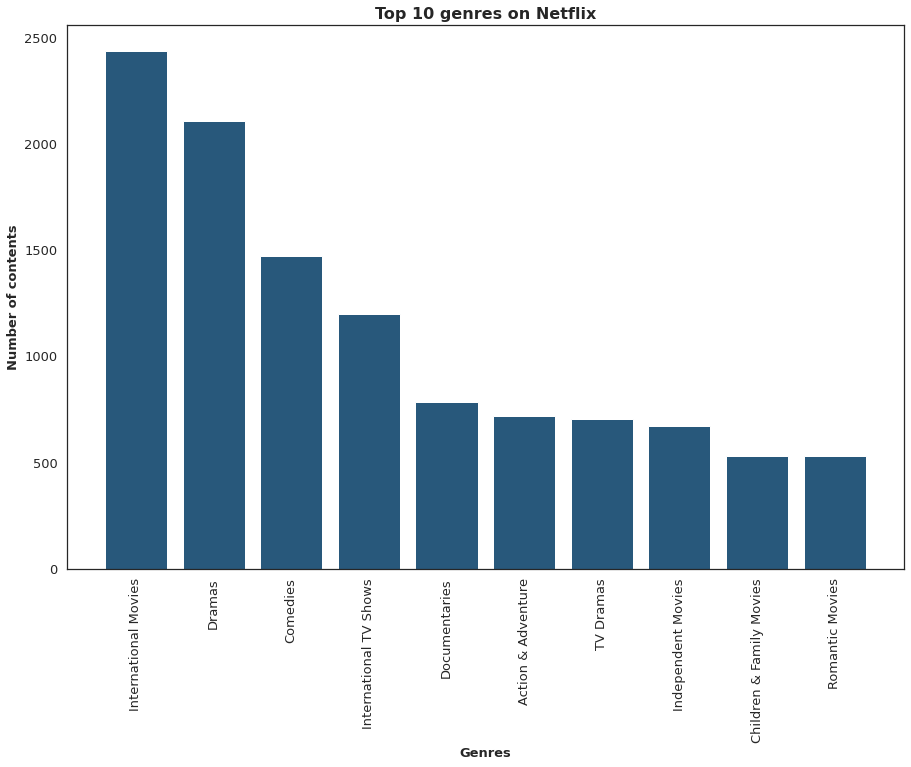

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,10))
plt.bar(x = bar_data['genre'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 genres on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Genres', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

International TV Shows and International Movies are two of the most dominant genres. Others include Dramas, Comedies, Documentaries and Action & Adventure.

####4.10 Who are the top 10 directors on Netflix?

In [ ]:
# Preparing the dataset
tv_director_df = tv_df.director.str.split(', ', expand=True).stack()
tv_director_df = tv_director_df.value_counts().reset_index().rename(columns={'index':'director',0:'count'})
bar_data = tv_director_df.head(10)

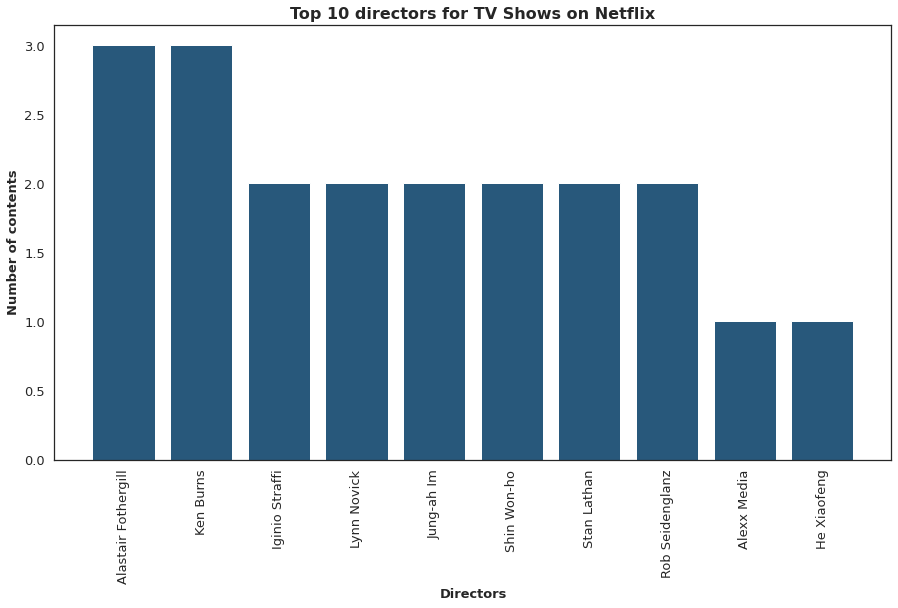

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['director'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 directors for TV Shows on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Directors', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

The top 10 TV shows directors on Netflix doesn't feature directors with more than 3 TV Shows on the streaming service.

In [ ]:
# Preparing the dataset
movies_director_df = movies_df.director.str.split(', ', expand=True).stack()
movies_director_df = movies_director_df.value_counts().reset_index().rename(columns={'index':'director',0:'count'})
bar_data = movies_director_df.head(10)

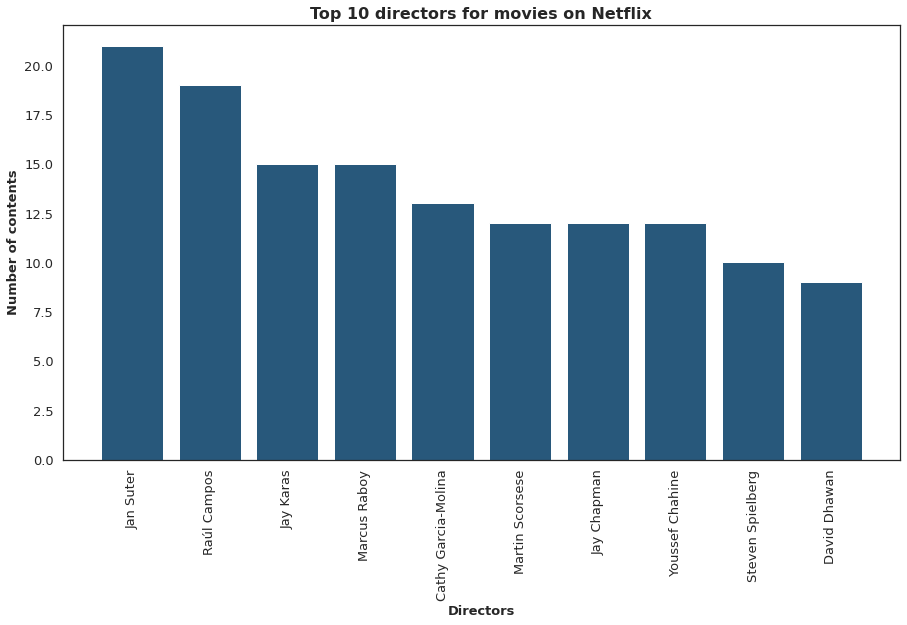

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['director'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 directors for movies on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Directors', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

Some of the biggest names of the industry like Steven Spielberg, Martin Scorsese and Jay Chapman feature in the list of top 10 movie directors on Netflix.

####4.11 Who are the top 10 actors/actress on Netflix?

In [ ]:
# Preparing the dataset
tv_cast_df = tv_df.cast.str.split(', ', expand=True).stack()
tv_cast_df = tv_cast_df.value_counts().reset_index().rename(columns={'index':'actor',0:'count'})
bar_data = tv_cast_df.head(10)

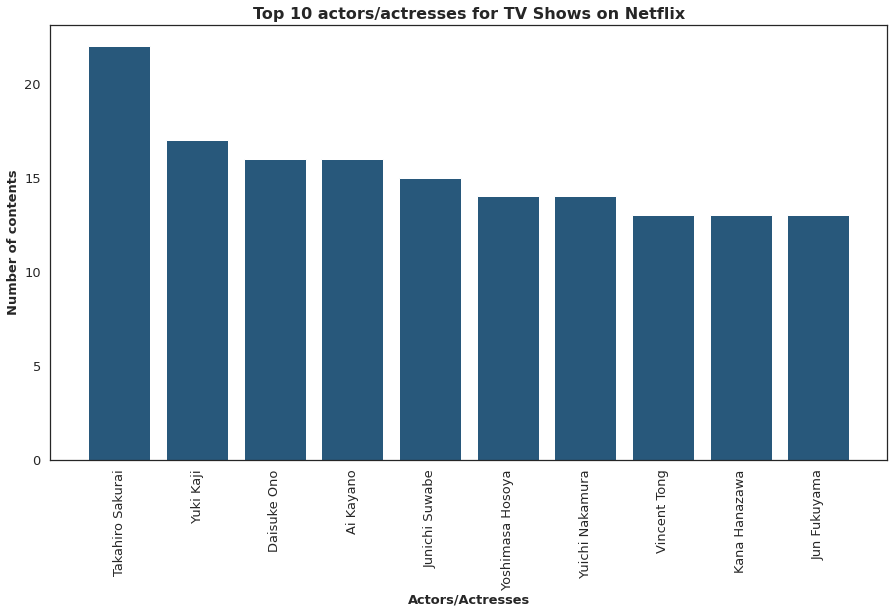

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['actor'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 actors/actresses for TV Shows on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Actors/Actresses', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

A lot of Asian, perhaps East Asian actors feature on the list of top 10 actors/actresses for TV Shows on Netflix.

In [ ]:
# Preparing the dataset
movies_cast_df = movies_df.cast.str.split(', ', expand=True).stack()
movies_cast_df = movies_cast_df.value_counts().reset_index().rename(columns={'index':'actor',0:'count'})
bar_data = movies_cast_df.head(10)

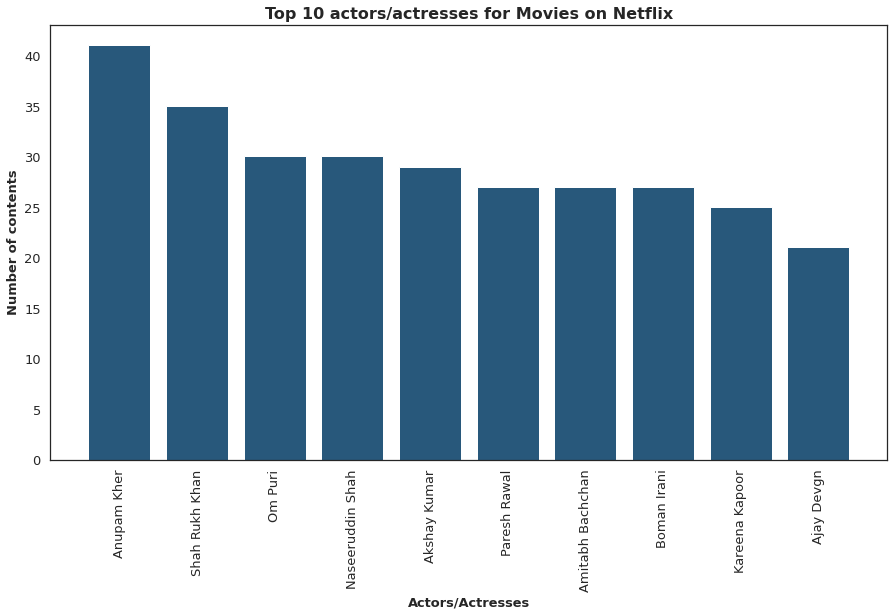

In [ ]:
# Plotting the graph
plt.figure(figsize = (15,8))
plt.bar(x = bar_data['actor'], 
        height = bar_data['count'],
        color = '#28587B')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('Top 10 actors/actresses for Movies on Netflix', fontsize = 16, fontweight = 'bold')
plt.xlabel('Actors/Actresses', fontsize = 13, fontweight = 'bold')
plt.ylabel('Number of contents', fontsize = 13, fontweight = 'bold')
plt.show();

**Observation:**

The list is full of A-listers from Bollywood, as expected given the number of movies from India on Netflix.

## ***5. Feature Engineering & Data Pre-processing***

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,day_of_week_added,year_added,day_of_month_added,date_month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8.00,4.00,2020.00,14.00,14-08 00:00:00
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12.00,4.00,2016.00,23.00,23-12 00:00:00
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12.00,3.00,2018.00,20.00,20-12 00:00:00
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11.00,3.00,2017.00,16.00,16-11 00:00:00
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1.00,2.00,2020.00,1.00,01-01 00:00:00


In [ ]:
#We will be using text columns to create clusters for our data.

cluster_df = df[['title']]
df[['description','listed_in','director','cast','country','rating']]=df[['description','listed_in','director','cast','country','rating']].astype(str)
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


####5.1 Lets remove the Punctuation from the text

In [ ]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


####5.2 Remove the stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

####5.3 Create an object of stemming fuction

In [ ]:
# create an object of stemming function
lemmatizer = WordNetLemmatizer()

def lemmet(text):    
    '''a function which stems each word in the given text'''
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lemmet)
cluster_df.head(2)

,cluster_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hit mexico city trapped...


In [ ]:
bag_of_words = cluster_df.cluster_data
bag_of_words

title
3%                                         future elite inhabit island paradise far crowd...
7:19                                       devastating earthquake hit mexico city trapped...
23:59                                      army recruit found dead fellow soldier forced ...
9                                          postapocalyptic world ragdoll robot hide fear ...
21                                         brilliant group student become cardcounting ex...
                                                                 ...                        
Zozo                                       lebanon civil war deprives zozo family he left...
Zubaan                                     scrappy poor boy worm way tycoon dysfunctional...
Zulu Man in Japan                          documentary south african rapper nasty c hit s...
Zumbo's Just Desserts                      dessert wizard adriano zumbo look next “willy ...
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    documentary delf myst

# **Vectorization**

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(t_vectorizer.vocabulary_)

{'future': 6517, 'elite': 5334, 'inhabit': 8124, 'island': 8336, 'paradise': 13298, 'far': 5872, 'crowded': 4125, 'slum': 16634, 'get': 6742, 'one': 12927, 'chance': 3245, 'join': 8809, 'saved': 15818, 'international': 8206, 'tv': 18382, 'show': 16444, 'drama': 4977, 'scifi': 15939, 'fantasy': 5871, 'nan': 12282, 'joão': 8894, 'miguel': 11698, 'bianca': 2267, 'comparato': 3743, 'michel': 11656, 'gomes': 6877, 'rodolfo': 15152, 'oliveira': 12886, 'rafael': 14291, 'lozano': 10623, 'porto': 13883, 'mel': 11502, 'sergio': 16159, 'zezé': 19867, 'celso': 3154, 'brazil': 2536, 'tvma': 18385, 'devastating': 4604, 'earthquake': 5142, 'hit': 7534, 'mexico': 11636, 'city': 3520, 'trapped': 18214, 'survivor': 17377, 'walk': 18971, 'life': 10312, 'wait': 18955, 'rescued': 14830, 'trying': 18306, 'desperately': 4576, 'stay': 17047, 'alive': 740, 'movie': 12079, 'jorge': 8860, 'demián': 4505, 'bichir': 2273, 'héctor': 7851, 'bonilla': 2432, 'oscar': 13050, 'serrano': 16171, 'ortiz': 13041, 'carmen': 

In [ ]:
print(X.shape)

(7787, 20000)


In [ ]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

# **Lets perform Dimensionality Reduction:**

In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

<Figure size 1680x600 with 0 Axes>

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

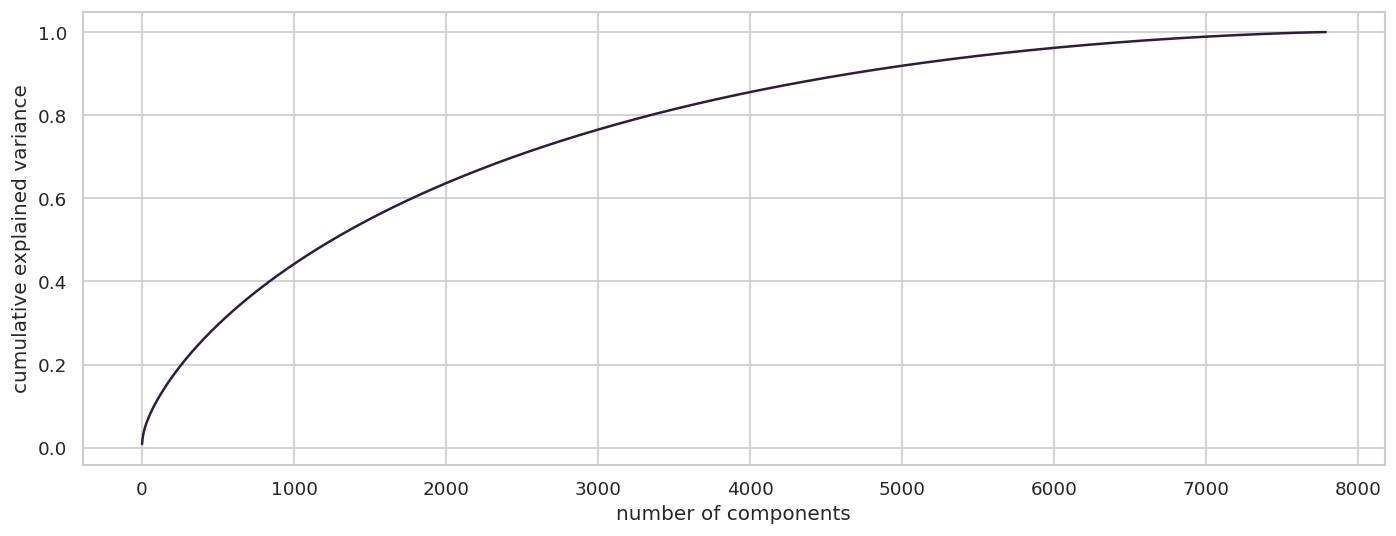

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 1. We can see from the above plot almost 95% of the variance can be explained by 5000 components.
## 2. Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

PCA(n_components=0.95)

(7787, 5675)

In [ ]:
X_transformed

array([[ 1.23170456e-01, -2.70387710e-02, -2.07936740e-02, ...,
         5.06026638e-04, -1.01986791e-03, -5.54181303e-03],
       [-4.42574762e-02, -3.46774698e-02,  1.07662109e-02, ...,
        -6.52347586e-03, -2.99928781e-03,  4.92863777e-03],
       [-5.14461788e-02, -4.27165134e-02, -2.47672849e-02, ...,
        -6.34187861e-03, -1.76518958e-04, -3.32749508e-03],
       ...,
       [-2.04576039e-02,  8.70837978e-02,  2.17386095e-01, ...,
         1.60437327e-02,  8.99217640e-03,  3.16780743e-03],
       [ 1.03178581e-01,  4.55147643e-03,  2.21154842e-02, ...,
         5.17361666e-03,  5.99396300e-03,  6.83330522e-03],
       [-4.93147636e-02,  2.27738868e-01,  2.21351286e-01, ...,
         2.70972989e-03, -1.02516547e-03, -7.87031571e-04]])

## **Get optimum K value using Metric:Shilhouette.**

In [ ]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=21, random_state=5),
                 k=(4, 22), locate_elbow=False, metric='silhouette',
                 timings=False)

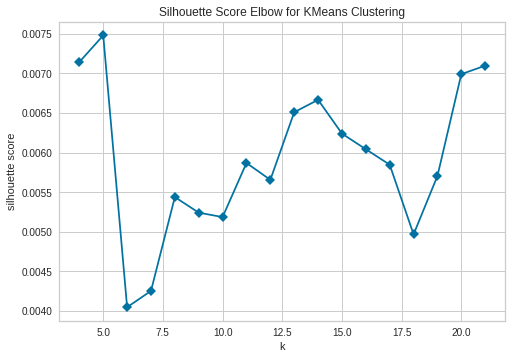

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

# **Elbow method to find optimum k value:**

<Figure size 1200x720 with 0 Axes>

KMeans(n_clusters=1, n_init=10, random_state=0)

KMeans(n_clusters=2, n_init=10, random_state=0)

KMeans(n_clusters=3, n_init=10, random_state=0)

KMeans(n_clusters=4, n_init=10, random_state=0)

KMeans(n_clusters=5, n_init=10, random_state=0)

KMeans(n_clusters=6, n_init=10, random_state=0)

KMeans(n_clusters=7, n_init=10, random_state=0)

KMeans(n_init=10, random_state=0)

KMeans(n_clusters=9, n_init=10, random_state=0)

KMeans(n_clusters=10, n_init=10, random_state=0)

KMeans(n_clusters=11, n_init=10, random_state=0)

KMeans(n_clusters=12, n_init=10, random_state=0)

KMeans(n_clusters=13, n_init=10, random_state=0)

KMeans(n_clusters=14, n_init=10, random_state=0)

KMeans(n_clusters=15, n_init=10, random_state=0)

KMeans(n_clusters=16, n_init=10, random_state=0)

KMeans(n_clusters=17, n_init=10, random_state=0)

KMeans(n_clusters=18, n_init=10, random_state=0)

KMeans(n_clusters=19, n_init=10, random_state=0)

KMeans(n_clusters=20, n_init=10, random_state=0)

KMeans(n_clusters=21, n_init=10, random_state=0)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

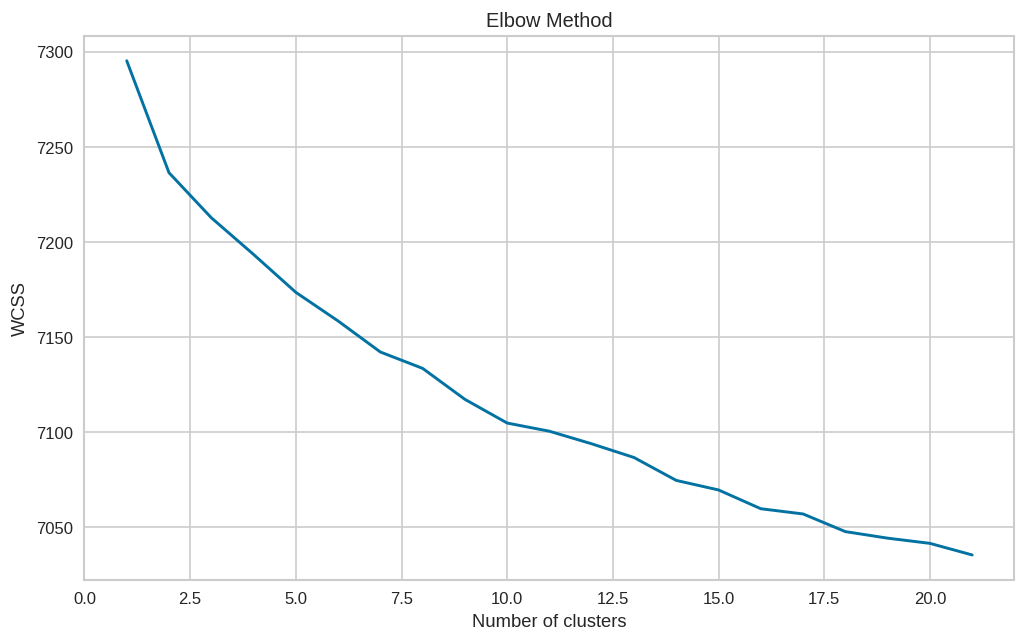

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Perform Clustering considering k=10.**

<Figure size 1200x720 with 0 Axes>

KMeans(n_clusters=10, random_state=9)

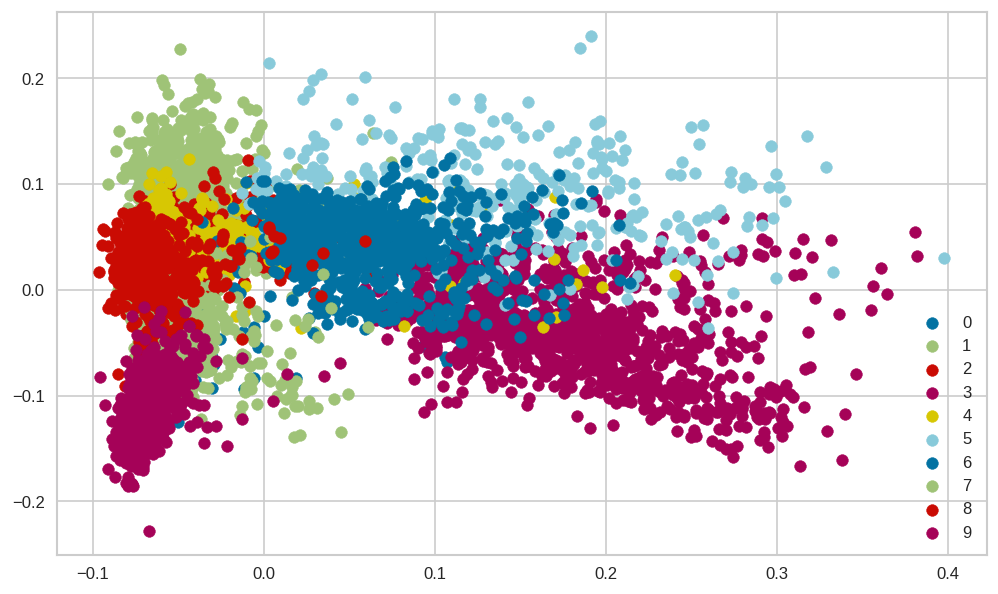

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

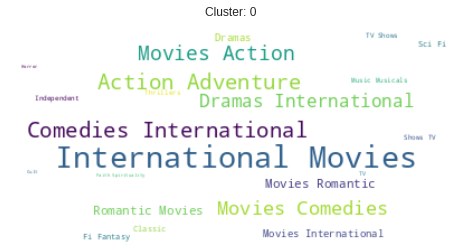

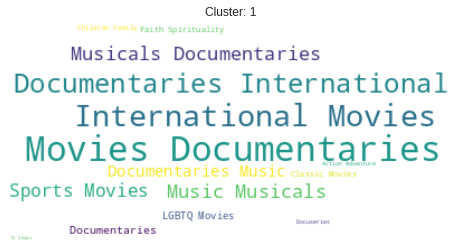

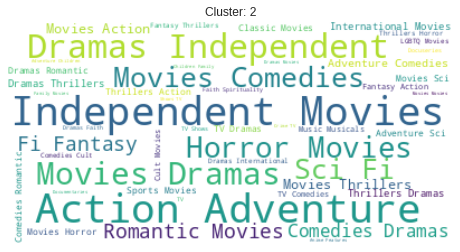

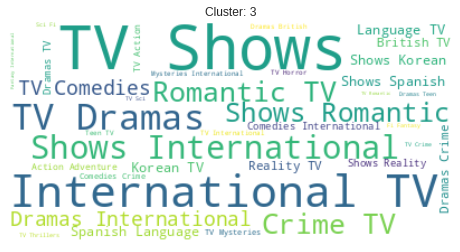

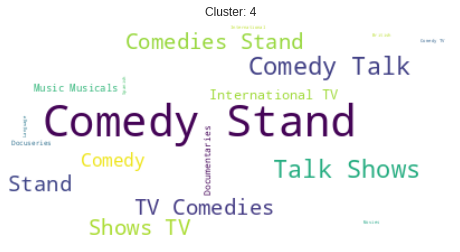

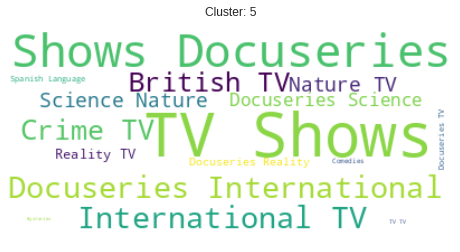

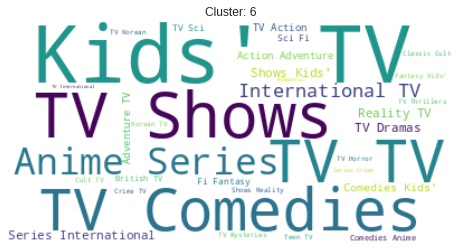

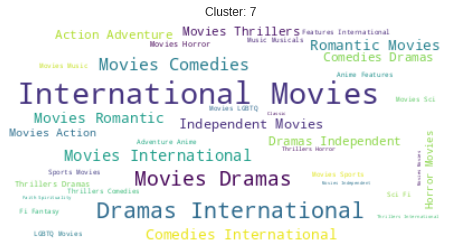

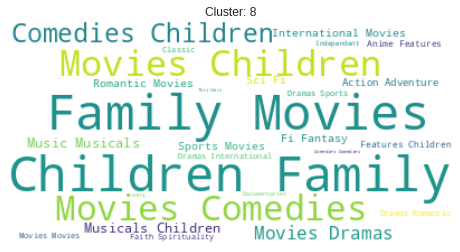

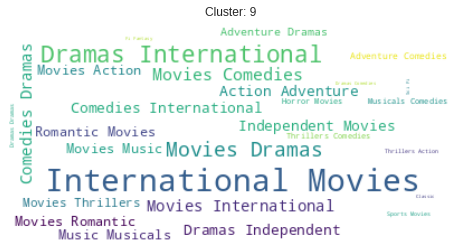

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.05410546, 0.01876723, ..., 0.01069868, 0.0234795 ,
        0.0059801 ],
       [0.05410546, 1.        , 0.00512171, ..., 0.05041783, 0.00197805,
        0.00349326],
       [0.01876723, 0.00512171, 1.        , ..., 0.00723458, 0.00197984,
        0.        ],
       ...,
       [0.01069868, 0.05041783, 0.00723458, ..., 1.        , 0.00975422,
        0.16613258],
       [0.0234795 , 0.00197805, 0.00197984, ..., 0.00975422, 1.        ,
        0.03013446],
       [0.0059801 , 0.00349326, 0.        , ..., 0.16613258, 0.03013446,
        1.        ]])

In [ ]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [ ]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,Bad Boys II
1,GoldenEye
2,Tortilla Soup
3,Martin Lawrence Live: Runteldat
4,War on Everyone
5,Madam Secretary
6,Slow West
7,Tremors 5: Bloodline
8,Dollar
9,Operation Odessa


In [ ]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

,Recommendations
0,13 Reasons Why: Beyond the Reasons
1,Unsolved Mysteries
2,The Sinner
3,Mind Game
4,Disappearance
5,Gigantosaurus
6,Anjaan: Special Crimes Unit
7,The Staircase
8,Re:Mind
9,Frequency
